## K-Nearest Neighbors(KNN)

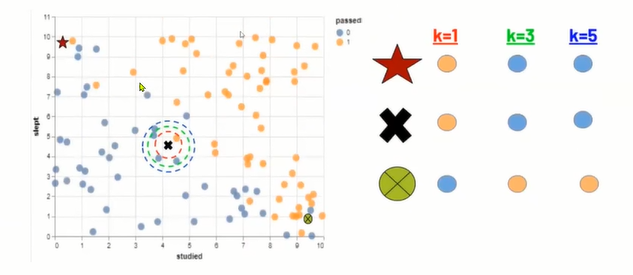

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Techproed DS/gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


In [7]:
df["Cancer Present"].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

value_counts dan datamızın balanced data old nu anlıyoruz.

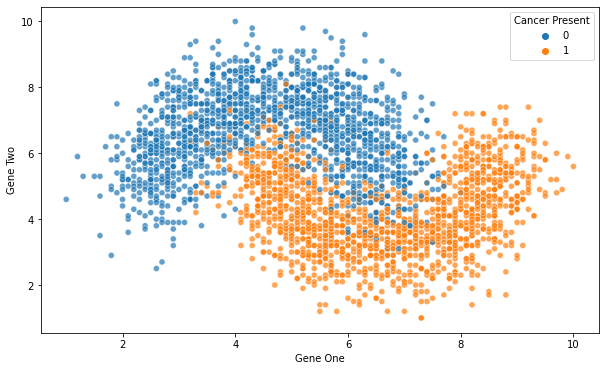

In [8]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7);

(4.0, 8.0)

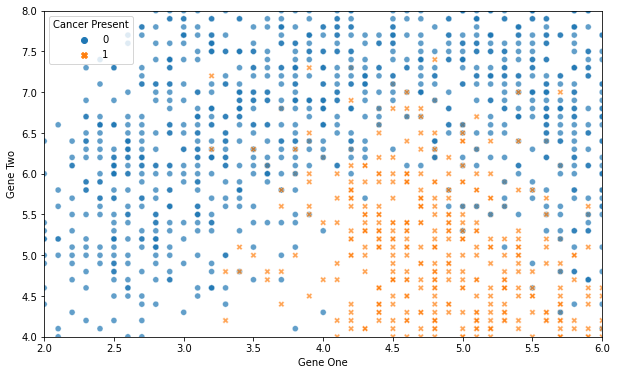

In [9]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df, alpha=0.7, style= "Cancer Present")
plt.xlim(2,6)
plt.ylim(4,8)

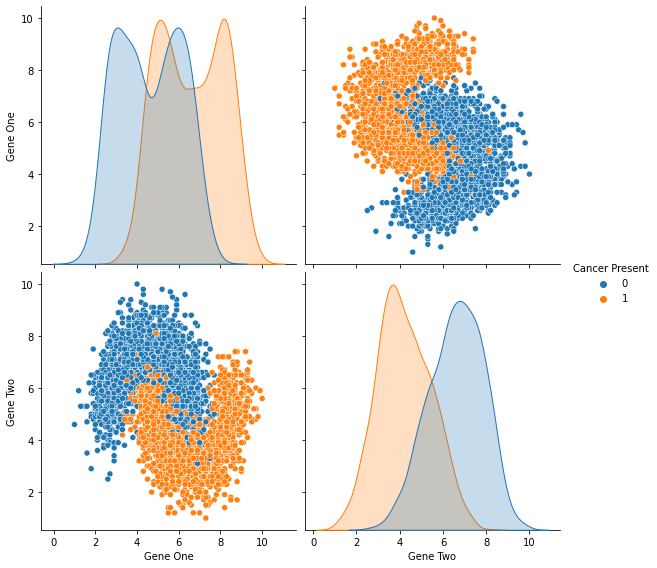

In [10]:
sns.pairplot(data=df, hue="Cancer Present", height=4, aspect =1);

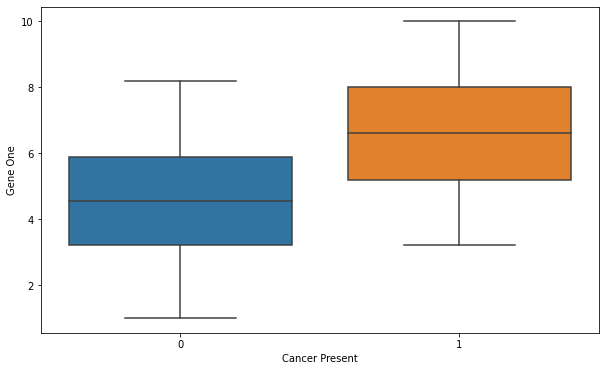

In [11]:
sns.boxplot(x= 'Cancer Present', y = 'Gene One', data=df);

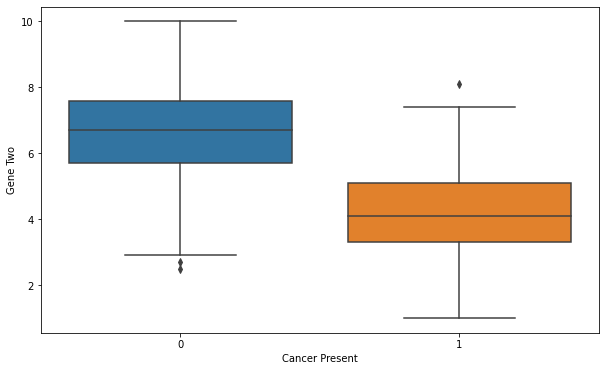

In [12]:
sns.boxplot(x= 'Cancer Present', y = 'Gene Two', data=df);

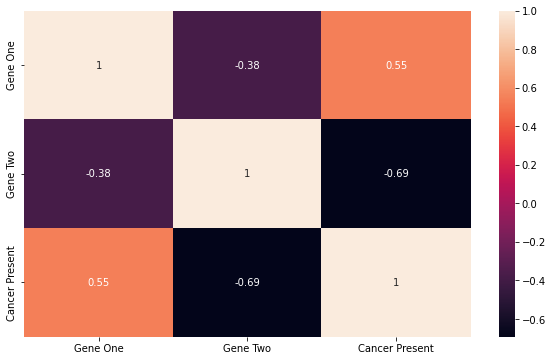

In [13]:
sns.heatmap(df.corr(), annot=True);

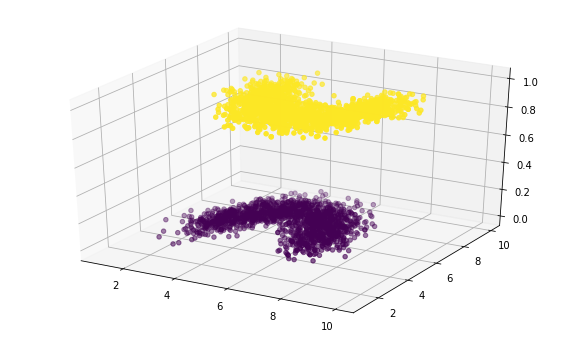

In [14]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gene One'], df['Gene Two'], df['Cancer Present'],c=df['Cancer Present']);

## Train|Test Split and Scaling Data

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [16]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

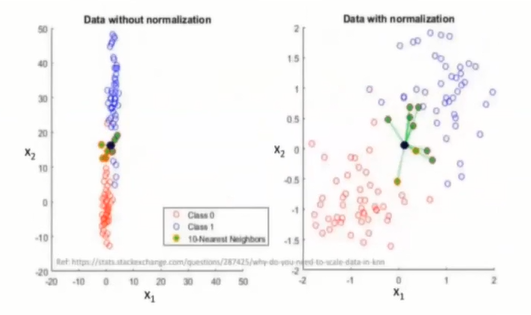

Yukarıdaki görselden anlamamız gereken en önemli şey, bizim KNN algoritmasını uygulamadan önce mutlaka ama mutlaka scaling işlemi yapmamız gerekiyor. Çünkü uzakta olan bir değeri yakın sanıp işleme alabilr eğer scale etmezsek ve data without normalization bölümündeki gibi olursa. Data with normalization bölümündeki gibi olması için mutlaka scale etmeliyiz datayı KNN'de.

In [18]:
scaler = StandardScaler() #

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=5) #default değer 5 k=5 k değerini burada veriyoruz

değer olarak tek sayı vermek daha makul çünkü arada kalma olasılığını düşürüyor, ayrıca yormuyor, algoritmanın tercih yapmasını kolaylaştırıyor. 

In [22]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [23]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [24]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [25]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
895,0.4,0.6
896,1.0,0.0
897,0.0,1.0
898,0.0,1.0


Yukarıdaki DF'de uzaklığa bağlı olarak olasılıklarını görüyoruz. Biz k=5 demiştik, 895. index de 0.4 ve 0.6 olarak görmemizin sebebi alınan 5 değerden 2'sinin 0, 3'ünün 1 olmasından kaynaklı ortaya çıkan yüzdelik oran.

In [26]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [27]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
637,0,0,0.0,1.0
2968,1,1,1.0,0.0
642,1,0,0.4,0.6
1173,1,1,1.0,0.0
322,1,1,1.0,0.0
2887,1,1,0.6,0.4
2421,0,0,0.0,1.0
168,1,1,0.8,0.2
1099,0,0,0.0,1.0
1748,1,1,0.8,0.2


## Model Performance on Classification Tasks

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [29]:
confusion_matrix(y_test, y_pred)

array([[439,  31],
       [ 34, 396]])

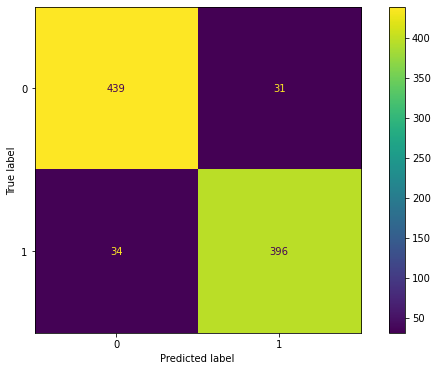

In [30]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [31]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[439  31]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



* Yukarıda accuracy dediğimiz değer aynı zamanda microdur ve tüm scorelar için aynıdır. Datamız balanced bir data ise, scorelar birbiriyle uyumlu ise accuracy'e bakabiliriz. 
* Multi-class larda ağırlık verdiğimiz iki üç sınıf varsa veya çoğunluğa göre hareket etmek istiyorsak weighted avg ye bakıyorduk.
* Eğer datamız imbalanced bir data ise macro avg ye bakıyorduk. 
* recall ve f1-score uyumlu olursa, precision da otomatik olarak yüksek olur bu yüzden buradaki iki önemli score umuz recall ve f1-score umuzdur. 

## Elbow Method for Choosing Reasonable K Values

Elbow Method Hyper parameter bulmak için kullandığımız bir method. Aynı amaçla kullandığımız bir diğer method ise Grid Search.

In [32]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [33]:
test_error_rates = []
train_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    train_error_rates.append(train_error)

Datamız dengeli old için yukarıda accuracy i kullandık error hesaplarken. Dengesiz olsaydı recall veya f1-score u da kullanabilirdik.

Text(0, 0.5, 'Error Rate')

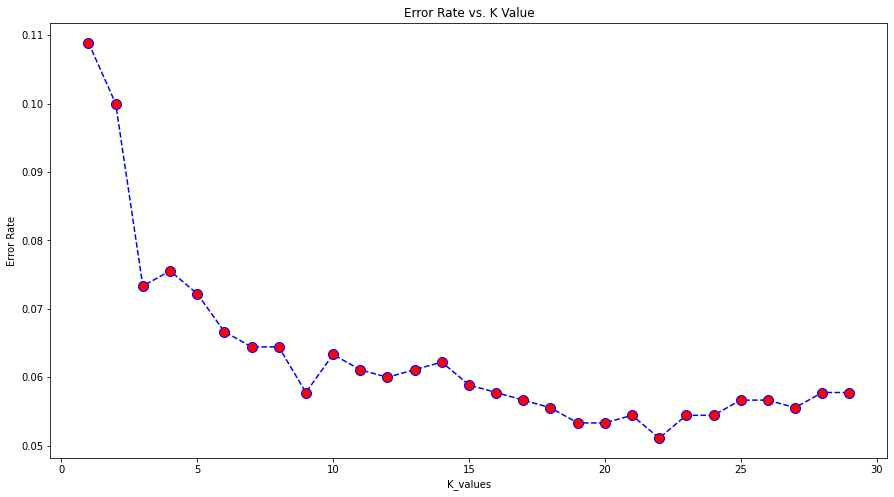

In [34]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')



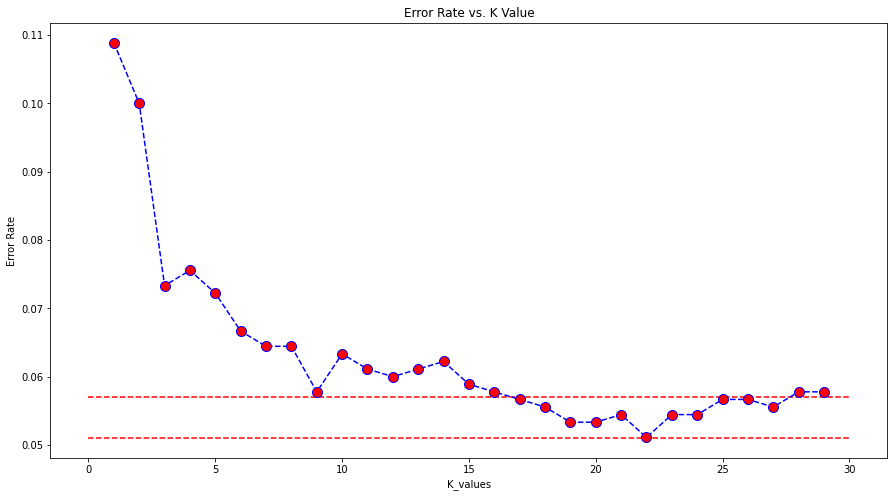

In [35]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.hlines(y=0.051, xmin = 0, xmax = 30, colors= 'r', linestyles="--") #Bunları ekledim
plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

Grafik üzerinden optimal k değerini tespit edebilmek adına ilk grafiğe ek olarak çizgileri ekledim. Optimal k değerinin 9 ya da 22 olabileceğini değerlendirmiştik. Fakat burada 9'u tercih etmek daha makul duruyor çünkü k sayısının 9 olduğunda ya da 22 olduğunda elde ettiği hata değeri 0.01'den bile daha küçük. Ayrıca modelin 9 komşusuna bakmaktansa 22 komşusuna bakması ve ona göre tahmin yapması daha maliyetli, bilgisayar için daha yorucu ve daha uzun süren bir süreç, üstelik ortaya anlamlı bir farklılık çıkartmıyor, burada 1 kişilik bile fark yok. Bir de k değerinin artarak 22 olması da aynı zamanda modeli overfitting'e götürebilecek bir durum. Bu yüzden biz burada 9'u tercih ettik. 

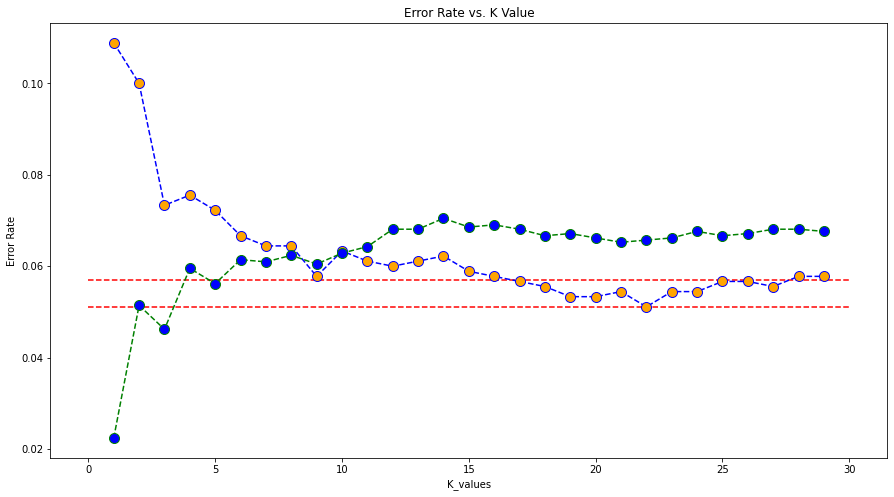

In [39]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='orange', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.hlines(y=0.051, xmin = 0, xmax = 30, colors= 'r', linestyles="--") #Bunları ekledim
plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

* Burada train ve t hatalarını k değerlerine göre karşılaştırdık. Bu optimal noktayı daha iyi görmemizi sağladığı gibi, yukarıdaki k=9 optimal değer kabul etmemizi doğruladı ve k=22'nin gerçekten de overfitting e gittiğini bize gösterdi. Turuncu noktalılar test hataları, mavi noktalılar train hataları.
* Burada grid search yerine elbow kullandık çünkü grid search bize 21 veriyordu ve neden 21 yerine 9'u tercih ettiğimiz de yukarıda yazılı. 

## Scores by Various K Values

In [40]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled,y_train)
print('WITH K=1\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=1

Test_Set

[[422  48]
 [ 50 380]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       470
           1       0.89      0.88      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900


Train_Set

[[1005   25]
 [  22 1048]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1030
           1       0.98      0.98      0.98      1070

    accuracy                           0.98      2100
   macro avg       0.98      0.98      0.98      2100
weighted avg       0.98      0.98      0.98      2100



In [42]:
knn = KNeighborsClassifier(n_neighbors=22)

knn.fit(X_train_scaled,y_train)
print('WITH K=22\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=22

Test_Set

[[452  18]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.96      0.93      0.95       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set

[[ 960   70]
 [  68 1002]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [43]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_scaled,y_train)
print('WITH K=9\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=9

Test_Set

[[446  24]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set

[[ 963   67]
 [  60 1010]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1030
           1       0.94      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



In [44]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_scaled,y_train)
print('WITH K=16\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=16

Test_Set

[[446  24]
 [ 29 401]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set

[[957  73]
 [ 71 999]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.93      0.93      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



## Cross Validate For Optimal K Value

In [45]:
from sklearn.model_selection import cross_val_score, cross_validate

In [46]:
model = KNeighborsClassifier(n_neighbors=9)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.003743,0.015622,0.919048,0.924528,0.915888,0.920188
2,0.001734,0.009933,0.942857,0.935780,0.953271,0.944444
3,0.001732,0.009230,0.947619,0.970588,0.925234,0.947368
4,0.001660,0.011338,0.871429,0.877358,0.869159,0.873239
5,0.002656,0.011104,0.923810,0.909910,0.943925,0.926606
6,0.001971,0.010785,0.909524,0.915094,0.906542,0.910798
7,0.001666,0.033190,0.942857,0.927928,0.962617,0.944954
8,0.004948,0.021272,0.938095,0.927273,0.953271,0.940092
9,0.002372,0.011437,0.961905,0.980583,0.943925,0.961905
10,0.001974,0.010352,0.895238,0.869565,0.934579,0.900901


In [47]:
df_scores.mean()[2:]

test_accuracy     0.925238
test_precision    0.923861
test_recall       0.930841
test_f1           0.927050
dtype: float64

## Predict New Observation

In [48]:
new_observation = [[3.5, 4.3]] 

In [49]:
knn_model.predict(new_observation)

array([1])

In [50]:
knn_model.predict_proba(new_observation)

array([[0.34482759, 0.65517241]])

In [51]:
new_observation_scaled = scaler.transform(new_observation)
new_observation_scaled

array([[-1.1393583 , -0.62176572]])

In [52]:
knn_model.predict(new_observation_scaled)

array([0])

Scale yaptığımızda tahmin değişti, bu yüzden mutlaka önce scale yapılmalı ardından knn modeline sokulmalı data

In [53]:
knn_model.predict_proba(new_observation_scaled)

array([[0.62068966, 0.37931034]])

## Gridsearch Method for Choosing Reasonable K Values

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
knn_grid = KNeighborsClassifier()

In [56]:
k_values= range(1,30)

In [57]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

best parameter ları aradığımız için şunlara bak ve kıyasla diye çeşitli kriterler veriyoruz.
* p değeri: 1 öklid, 2 manhattan hesaplamalarına göre knn hesapla demek
* weights: uniformda tüm komşularına aynı muameleyi yapar, sayısı k değerine en yakın olan 1'se 1'i, 0'sa 0'ı alır, yani en fazla olan kategoriyi alır; distance'da ise uzaklıklarına göre ağırlık veriyor, en büyük ağırlık hangi kategorideyse onu alıyor. 

In [58]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [59]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [60]:
knn_grid_model.best_params_

{'n_neighbors': 21, 'p': 1, 'weights': 'uniform'}

Biz grafikten baktığımızda 22 görmüştük ama grid search ile 21 çıktı, bu bizim datayı test-train split yapmamızdan kaynaklı yani data küçüldüğü için bu tip farklar olabilir. 

In [61]:
print('WITH K=21\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=21

Test_Set

[[447  23]
 [ 27 403]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       470
           1       0.95      0.94      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set

[[957  73]
 [ 71 999]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.93      0.93      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



## Evaluating ROC Curves and AUC

In [62]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [63]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

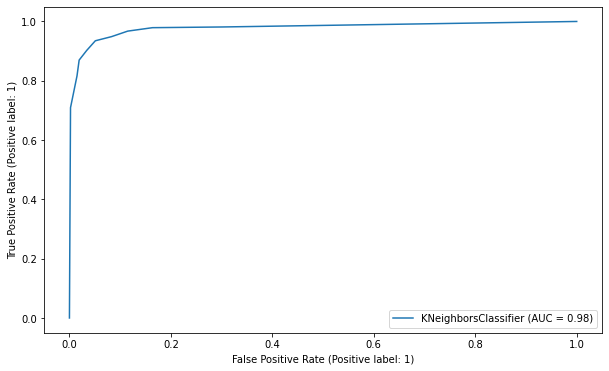

In [65]:
plot_roc_curve(knn_model, X_test_scaled, y_test);

In [66]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9781444829292429

## Final Model and Model Deployment

In [67]:
import pickle

In [68]:
scaler = StandardScaler()

In [69]:
scaler.fit(X)

StandardScaler()

pickle da fit aşamasından sonra bütün datayı transform yapıyoruz. Kayıt aşamamız fit ile ilgili bütün bilgilerin olduğu aşama. Eğer transform yapıp sonra fit dersek yapacağımız aşamaların hiçbirini kaydetmez o yüzden bu kısım önemli. Yani Scale kaydederken ya da Final Model kaydederken fit aşamasından sonra kaydediyoruz. 
> Biz model fit ettiğimizde, model datanın tüm bilgisine hakim ve her işleme hazır hale geliyor. 

In [70]:
X_scaled = scaler.transform(X)

In [71]:
final_knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_scaled,y)

final_knn_model de old gibi bu şekilde de fit edilebiliyor. 

In [72]:
pickle.dump(final_knn_model, open('knn_final.pkl', 'wb'))

In [73]:
pickle.dump(scaler, open('scaler_knn.pkl', 'wb'))

pickle dump ı her zaman yapmak zorunda değiliz ama bulutta çalışırken vs dataya ulaşabilmemiz için gerekli. 

## Predict New Observations

In [74]:
loaded_scaler = pickle.load(open('scaler_knn.pkl', 'rb'))

In [75]:
loaded_model = pickle.load(open('knn_final.pkl', 'rb'))

In [77]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0


In [78]:
new_obs = {"Gene One": [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           "Gene Two": [1, 4, 4, 5.5, 6.7, 10, 8, 1]
          }

In [79]:
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.0,1.0
1,3.0,4.0
2,4.3,4.0
3,5.6,5.5
4,7.0,6.7
5,9.5,10.0
6,2.0,8.0
7,6.0,1.0


In [80]:
samples_scaled = loaded_scaler.transform(samples)
samples_scaled

array([[-2.51637037e+00, -2.55118325e+00],
       [-1.42232801e+00, -8.15868071e-01],
       [-7.11200471e-01, -8.15868071e-01],
       [-7.29361574e-05,  5.17895174e-02],
       [ 7.65756716e-01,  7.45915588e-01],
       [ 2.13330967e+00,  2.65476228e+00],
       [-1.96934919e+00,  1.49788550e+00],
       [ 2.18735536e-01, -2.55118325e+00]])

In [81]:
predictions = loaded_model.predict(samples_scaled)
predictions_proba = loaded_model.predict_proba(samples_scaled)

In [82]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,Gene One,Gene Two,pred,pred_proba_1,pred_proba_0
0,1.0,1.0,0,0.000000,1.000000
1,3.0,4.0,0,0.111111,0.888889
2,4.3,4.0,1,1.000000,0.000000
3,5.6,5.5,0,0.222222,0.777778
4,7.0,6.7,0,0.000000,1.000000
5,9.5,10.0,1,0.666667,0.333333
6,2.0,8.0,0,0.000000,1.000000
7,6.0,1.0,1,1.000000,0.000000


## Pipeline

What happens can be described as follows:

Step 1: The data are split into TRAINING data and TEST data according to ratio of train_test_split-train ve test olarak ayır

Step 2: the scaler is fitted on the TRAINING data - Train datasını fit et

Step 3: the scaler transforms TRAINING data - train datasını transform et

Step 4: the models are fitted/trained using the transformed TRAINING data

Step 5: the scaler is used to transform the TEST data

Step 6: the trained models predict using the transformed TEST data

Pipeline kullanıyorsak bütün temel işlemleri kendi yapıyor sadece ne istediğimizi içine veriyoruz. Sonra yukarıdaki 6 adımı kendi yapıyor. Pipeline'ı bütün modellerde, her şeyde kullanabiliyoruz. 

In [83]:
from sklearn.pipeline import Pipeline

In [84]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

Yukarıda operations verdik, bunu pipeline a girince aslında önce;
1. pipe.fit(X_train, y_train) yani önce fit et
2. scaler.fit_transform(X_train) sonra modeli scale et
3. knn.fit(scaled_X_train, y_train) sonra da knn modeli uygula demiş oluyoruz. Aşamaları bu şekilde. 
> pipeline ı tek modelde çalıştırabiliyoruz, mesela hem knn yap hem başka bi modele de bak diye farklı modelleri içine girip veremiyoruz grid search deki gibi. Bir diğer deyişle kıyaslamalı ilerlemiyor. 

In [85]:
Pipeline(steps=operations)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [86]:
pipe_model = Pipeline(steps=operations)

In [87]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

Aşağıdaki pipe_model predict için pipeline aşamaları:
1. pipe.predict(X_test)
2. scaler.transform(X_test)
3. knn.predict(scaled_X_test)

In [88]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

## Model Performance

In [89]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

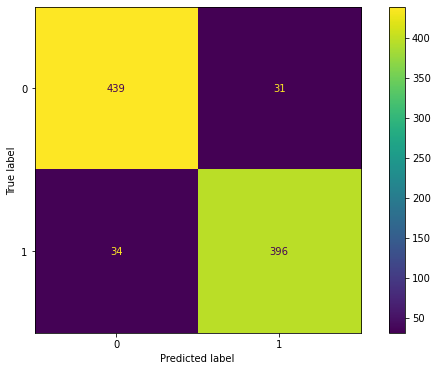

In [90]:
plot_confusion_matrix(pipe_model, X_test, y_test); #normalde olsa buraya scale edilmiş test datamı verecektim ama pipline da buna gerek yok

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



## Changing the parameters of the pipe_model

In [92]:
pipe_model.get_params()  # pipemodelimin içindeki parametreleri görüntüle dedik

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [93]:
pipe_model.set_params(knn__n_neighbors= 9) #Euclidean
# 5 olan knn__n_neighbors u 9 olarak değiştirmek istedim. 

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [94]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=9))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=9),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 9,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [95]:
pipe_model['scaler']

StandardScaler()

In [96]:
pipe_model["knn"]

KNeighborsClassifier(n_neighbors=9)

## GridSearch on Pipeline

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
param_grid = {'knn__n_neighbors': range(1,30)}
pipe_model = Pipeline(steps=operations)

modelimi sıfırlamak zorundayım grid search yapacağım ama pipeline ile girdiğim için bunu mutlaka pipeline ımın içindeki değerlerle/parametrelerle yapmak zorundayım. O yüzden yukarıdaki kod bloğundaki gibi yazdık. 

In [99]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring= 'f1')

In [100]:
pipe_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=9))]),
             param_grid={'knn__n_neighbors': range(1, 30)}, scoring='f1')

In [101]:
pipe_grid.best_params_

{'knn__n_neighbors': 21}

## CrossValidate on Pipeline

In [102]:
operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=9))]
model = Pipeline(operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.923029
test_recall       0.931776
test_f1           0.927106
test_accuracy     0.925238
dtype: float64

Normalde cross validation yaparken scale edilmiş datayı içine veriyorduk, ama aslında bu göz ardı edilebilir miktarda da olsa data gidişi oluyor, sızıntı gibi düşünebilirsin. Çünkü cross-validation yaparken model tüm datayı görüyor. Fakat pipeline ile CV yaptığımızda pipeline her defasında modeli sıfırlıyor. Bu bir nevi pipeline ın aldığı bir güvenlik önlemi gibi. Bu sayede hiç data kaybı olmuyor. Bundan böyle CV ları hep pipeline ile yapacağız. 

## Final pipe_model 

In [103]:
operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=9))]

In [104]:
pipe_final = Pipeline(operations)

In [105]:
pipe_final.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

## Predict New Observations with pipe_model

In [106]:
new_obs = {"Gene One": [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           "Gene Two": [1, 4, 4, 5.5, 6.7, 10, 8, 1]
          }
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.0,1.0
1,3.0,4.0
2,4.3,4.0
3,5.6,5.5
4,7.0,6.7
5,9.5,10.0
6,2.0,8.0
7,6.0,1.0


In [107]:
predictions = pipe_final.predict(samples)
predictions

array([0, 0, 1, 0, 0, 1, 0, 1])

In [108]:
predictions_proba = pipe_final.predict_proba(samples)
predictions_proba

array([[1.        , 0.        ],
       [0.88888889, 0.11111111],
       [0.        , 1.        ],
       [0.77777778, 0.22222222],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ]])

In [109]:
samples["pred"] = predictions
samples["pred_proba"] = predictions_proba[:,1]
samples

,Gene One,Gene Two,pred,pred_proba
0,1.0,1.0,0,0.000000
1,3.0,4.0,0,0.111111
2,4.3,4.0,1,1.000000
3,5.6,5.5,0,0.222222
4,7.0,6.7,0,0.000000
5,9.5,10.0,1,0.666667
6,2.0,8.0,0,0.000000
7,6.0,1.0,1,1.000000
